## Simple fitting with sasmodels and bumps
The model functions from sasmodels can be used to fit experimental data. This can be done using bumps, which simillar to sasmodels is a separate package and needs to be installed in your path.

## Import sasmodels and bumps

In [1]:
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasdata.dataloader.loader import Loader

from bumps.names import *
from bumps.fitters import fit
from bumps.formatnum import format_uncertainty

import matplotlib.pyplot as plt

## Load the data

In [2]:
loader = Loader()

In [3]:
exp_data = loader.load('notebook_files/ISIS_polymer_scipp_no_solid_angle.nxs')[0]

points_to_remove = 15
exp_data.x = exp_data.x[:-points_to_remove]
exp_data.y = exp_data.y[:-points_to_remove]
exp_data.dy = exp_data.dy[:-points_to_remove]

#The sasdata requires explicit setup of qmin, qmax and mask
exp_data.qmin = exp_data.x[0]
exp_data.qmax = exp_data.x[-1]
exp_data.mask = np.isnan(exp_data.y)

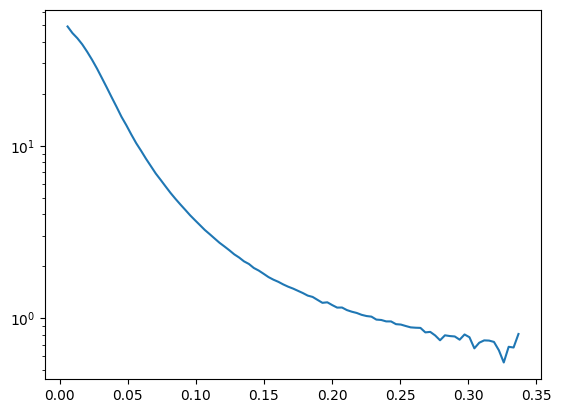

In [4]:
#TODO: Print and plot data 
plt.plot(exp_data.x, exp_data.y)
plt.yscale('log')

## Setup model

In [5]:
kernel = load_model('poly_gauss_coil')
pars = dict(i_zero=30, 
            rg=40,
            polydispersity=1.02,
            background=0.0001,
            scale=1.0)
model = Model(kernel, **pars)

# SET THE FITTING PARAMETERS
model.i_zero.range(1, 80)
model.rg.range(1, 90)
model.background.range(0.001, 1)


Parameter(background)

## Setup Optimizer (Bumps)

In [6]:
M = Experiment(data=exp_data, model=model)
problem = FitProblem(M)

## Compute initial model

Initial chisq 4128.165650604658


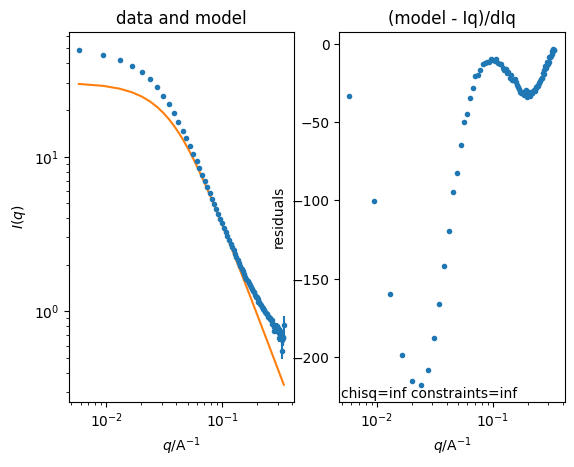

In [7]:
print(f"Initial chisq {problem.chisq()}")
problem.plot()

## Fit model to the data

# steps: 334, # draws: 10020
step 1 cost 4123.395(39)
                              background |......... 0.00100052 in (0.001,1)
                                  i_zero ...|......    30.0001 in (1,80)
                                      rg ....|.....         40 in (1,90)
step 218 cost 36.627(39)
step 437 cost 36.625(39)
final chisq 36.625(39)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.2647(16)     
                                  i_zero   49.945(50)     
                                      rg   53.260(38)     
Final chisq 36.62453145832797
background : 0.2647(23)
i_zero : 49.945(71)
rg : 53.260(58)


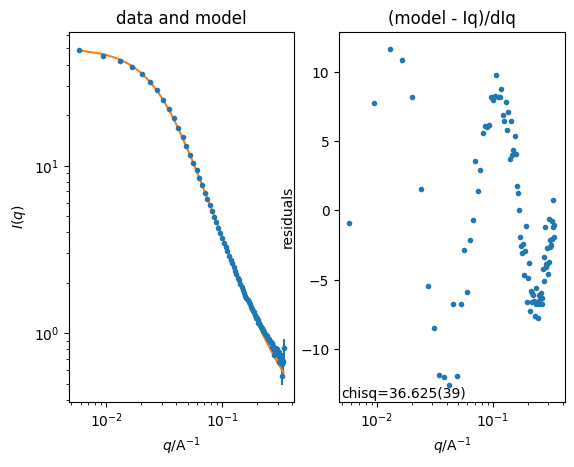

In [8]:
result = fit(problem, method='dream', verbose=True)
print(f"Final chisq {problem.chisq()}")
for k, v, dv in zip(problem.labels(), result.x, result.dx):
    print(f"{k} : {format_uncertainty(v, dv)}")
problem.plot()